EDA for plaicraft data, group 21

In [1]:
import pandas as pd
import altair as alt

## (1) Data Description:
Provide a full descriptive summary of the dataset, including information such as the number of observations, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.

Note that the selected dataset will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. You need to summarize the full data regardless of which variables you may choose to use later on.

## (2) Question:
Clearly state one question your group will try to answer using the selected dataset (of the questions above). Your analysis should involve the response variable of interest and one or more explanatory variables. Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.

## (3) Exploratory Data Analysis and Visualization
In this assignment, you will:

## Demonstrate that the dataset can be loaded into Python.
Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.

## (4) Methods and Plan
Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How are you going to compare and select the model?
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

## Part 1: Data description

In [2]:
players = pd.read_csv("data/players.csv")

In [3]:
sessions = pd.read_csv("data/sessions.csv")

In [4]:
#loading in the dataframes

In [9]:
#converting time as string to datetime objects for convenience

In [10]:
sessions["start_time"] = pd.to_datetime(sessions["start_time"], dayfirst=True)

In [11]:
sessions["end_time"] = pd.to_datetime(sessions["end_time"], dayfirst=True)

In [12]:
#feature engineering timedelta64 objects from end time and start time with pandas' handy tools!

In [13]:
timedelta = sessions["end_time"] - sessions["start_time"]

In [14]:
timedelta.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1535 entries, 0 to 1534
Series name: None
Non-Null Count  Dtype          
--------------  -----          
1533 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 12.1 KB


In [15]:
#quick showing of what timedelta can do for us:

In [16]:
sessions["start_time"][0] + timedelta[0]

Timestamp('2024-06-30 18:24:00')

In [17]:
sessions["end_time"][0]

Timestamp('2024-06-30 18:24:00')

In [18]:
sessions["session_length_minutes"] = timedelta.dt.total_seconds() / 60

In [19]:
sessions_timedelta = sessions.copy(deep=True)

In [20]:
sessions_timedelta["timedelta"] = timedelta
sessions_timedelta.head()

,hashedEmail,start_time,end_time,original_start_time,original_end_time,session_length_minutes,timedelta
0,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-06-30 18:12:00,2024-06-30 18:24:00,1.719770e+12,1.719770e+12,12.0,0 days 00:12:00
1,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-06-17 23:33:00,2024-06-17 23:46:00,1.718670e+12,1.718670e+12,13.0,0 days 00:13:00
2,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3...,2024-07-25 17:34:00,2024-07-25 17:57:00,1.721930e+12,1.721930e+12,23.0,0 days 00:23:00
3,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-07-25 03:22:00,2024-07-25 03:58:00,1.721880e+12,1.721880e+12,36.0,0 days 00:36:00
4,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-05-25 16:01:00,2024-05-25 16:12:00,1.716650e+12,1.716650e+12,11.0,0 days 00:11:00


In [21]:
sessions.head()

,hashedEmail,start_time,end_time,original_start_time,original_end_time,session_length_minutes
0,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-06-30 18:12:00,2024-06-30 18:24:00,1.719770e+12,1.719770e+12,12.0
1,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-06-17 23:33:00,2024-06-17 23:46:00,1.718670e+12,1.718670e+12,13.0
2,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3...,2024-07-25 17:34:00,2024-07-25 17:57:00,1.721930e+12,1.721930e+12,23.0
3,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-07-25 03:22:00,2024-07-25 03:58:00,1.721880e+12,1.721880e+12,36.0
4,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-05-25 16:01:00,2024-05-25 16:12:00,1.716650e+12,1.716650e+12,11.0


In [23]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   hashedEmail             1535 non-null   object        
 1   start_time              1535 non-null   datetime64[ns]
 2   end_time                1533 non-null   datetime64[ns]
 3   original_start_time     1535 non-null   float64       
 4   original_end_time       1533 non-null   float64       
 5   session_length_minutes  1533 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 72.1+ KB


In [149]:
players.head()

,experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
0,Pro,True,f6daba428a5e19a3d47574858c13550499be23603422e6...,30.3,Morgan,Male,9,NaN,NaN
1,Veteran,True,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa9397...,3.8,Christian,Male,17,NaN,NaN
2,Veteran,False,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3...,0.0,Blake,Male,17,NaN,NaN
3,Amateur,True,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4f...,0.7,Flora,Female,21,NaN,NaN
4,Regular,True,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb...,0.1,Kylie,Male,21,NaN,NaN


In [154]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experience        196 non-null    object 
 1   subscribe         196 non-null    bool   
 2   hashedEmail       196 non-null    object 
 3   played_hours      196 non-null    float64
 4   name              196 non-null    object 
 5   gender            196 non-null    object 
 6   age               196 non-null    int64  
 7   individualId      0 non-null      float64
 8   organizationName  0 non-null      float64
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 12.6+ KB


In [152]:
sessions.groupby("hashedEmail").count().sort_values(by="start_time", ascending=False)

,start_time,end_time,original_start_time,original_end_time,session_length_minutes
hashedEmail,,,,,
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,310,310,310,310
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219,219,219,219,219
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159,159,159,159,159
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,147,147,147,147,147
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,130,130,130,130,130
...,...,...,...,...,...
f707d141be44b2bf963eb171dbd14599059b4dda09aa002ba95ead4fa67273a7,1,1,1,1,1
fc0224c81384770e93ca717f32713960144bf0b52ff67639433a5c06a653a882,1,1,1,1,1
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1,1,1,1,1


Note there is a discrepancy where there are `196` players registered in players.csv, yet sessions only has `125` unique players for a session

## Summary of sessions and players:

So there are two csv files, sessions and players

"players" contains all registrants, and is 196 rows long. It is 9 columns wide. It effectively has 7 columns. 1 row/observation = 1 player's info, so 196 players' info registered.

In its columns are: 
- self-reported experience level, either Pro/Veteran/Amateur (string),
- subscribed to newsletter, which is T/F,
- a player's hashedEmail which is an anonymous but unique identifier (string),
- total hours player which is a number,
- their name (string),
- gender (string),
- age (int),
- and individualID and organization name which are both empty.

So the "subscribe" column should mean subscription to plaicraft's newsletter, and the rest is self explanatory. "played_hours" is the cumulative hours played for a player

The "sessions.csv" file is 1606 rows long, and 5 columns wide. 1 row = 1 tracked session

It contains hashedEmail as an identifier, which it shares in common with "players". Note that the frames can be merged on this variable.

The next columns are "start_time", "end_time", "original_start_time", "original_end_time".

"original_start_time" and "original_end_time" are both times of sessions beginning and ending in Unix time, and this can be verified by copying values into a Unix time calculator online (after undoing the exponential notation).

"start_time" and "end_time" are then dates and times in DD/MM/YYYY, as well as 24 hour time. Time zones are not specified (and would be a bit excessive?)

Also note that a few hashedEmail records in players do not have corresponding records in sessions. The reverse is not true.

This means that there are some players who registered who have never played, and therefore are not tracked in the sessions frame.

Fortunately every record in sessions has a corresponding hashedEmail in players - that is everybody who played also had their registration tracked.

## Question:

We have selected question 3, which is as follows:

Question 3: We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 

The data in players and sessions should help me in answering that, because the latter contains very granular data on the start and end times of each play session and by who, and the former has other info on each player.

## 2) EDA:

In [108]:
players.describe()

,played_hours,age,individualId,organizationName
count,196.000000,196.000000,0.0,0.0
mean,5.845918,21.280612,NaN,NaN
std,28.357343,9.706346,NaN,NaN
min,0.000000,8.000000,NaN,NaN
25%,0.000000,17.000000,NaN,NaN
50%,0.100000,19.000000,NaN,NaN
75%,0.600000,22.000000,NaN,NaN
max,223.100000,99.000000,NaN,NaN


In [109]:
players_by_played_hours = players.sort_values(by="played_hours")

In [218]:
players_by_played_hours.head()

,experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
2,Veteran,False,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3...,0.0,Blake,Male,17,NaN,NaN
7,Amateur,False,1d2371d8a35c8831034b25bda8764539ab7db0f6393869...,0.0,Emerson,Male,21,NaN,NaN
6,Regular,True,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d...,0.0,Luna,Female,19,NaN,NaN
5,Amateur,True,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee...,0.0,Adrian,Female,17,NaN,NaN
15,Amateur,False,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae...,0.0,Quinlan,Male,22,NaN,NaN


In [219]:
# unique_vs_cumulative_hours = alt.Chart(players_by_played_hours, title="All 125 unique players by total playtime").mark_bar().encode(
#     x=alt.X("hashedEmail", axis=alt.Axis(labels=False)).sort("-y").title("Unique registrants"),
#     y=alt.Y("played_hours",).title("Hours played")
# ).properties(width = 1000)

# unique_vs_cumulative_hours

In [220]:
under20 = players[players["played_hours"] < 20]

In [222]:
(players["played_hours"] < 1).sum()

np.int64(154)

In [223]:
(players["played_hours"] < 2).sum()

np.int64(170)

In [224]:
# unique_vs_cumulative_hours_under20 = alt.Chart(under20, title="Unique players by total playtime, for those under 20 hours").mark_bar().encode(
#     x=alt.X("hashedEmail", axis=alt.Axis(labels=False)).sort("-y").title("Unique registrants"),
#     y=alt.Y("played_hours").title("Hours played")
# ).properties(width=1000)

# unique_vs_cumulative_hours_under20

In [225]:
unique_vs_cumulative_hours_and_experience = alt.Chart(players_by_played_hours, title="All 125 unique players by total playtime and experience level").mark_bar().encode(
    x=alt.X("hashedEmail", axis=alt.Axis(labels=False)).sort("-y").title("Unique registrants"),
    y=alt.Y("played_hours").title("Hours played"),
    color=alt.Color("experience")
).properties(width = 1000)

unique_vs_cumulative_hours_and_experience


alt.Chart(...)

In [226]:
unique_vs_cumulative_hours_and_experience_under20 = alt.Chart(under20, title="Unique players by total playtime, for those under 20 hours by experience level" ).mark_bar().encode(
    x=alt.X("hashedEmail", axis=alt.Axis(labels=False)).sort("-y").title("Unique registrants"),
    y=alt.Y("played_hours").title("Hours played"),
    color=alt.Color("experience")
).properties(width = 1000)

unique_vs_cumulative_hours_and_experience_under20

alt.Chart(...)

In [228]:
unique_vs_hours_and_subscribed = unique_vs_cumulative_hours = alt.Chart(players_by_played_hours, title="All 125 Unique players by total playtime, coloured subscription status").mark_bar().encode(
    x=alt.X("hashedEmail", axis=alt.Axis(labels=False)).sort("-y").title("Unique registrants"),
    y=alt.Y("played_hours").title("Hours played"),
    color=alt.Color("subscribe")
).properties(width = 1000)

unique_vs_cumulative_hours


unique_vs_hours_and_subscribed

alt.Chart(...)

In [229]:
alt.Chart(under20, title="Unique players by total playtime, for those under 20 hours, and subscription status").mark_bar().encode(
    x=alt.X("hashedEmail", axis=alt.Axis(labels=False)).sort("-y").title("Unique registrants"),
    y=alt.Y("played_hours").title("Hours played"),
    color=alt.Color("subscribe")
).properties(width = 1000)

alt.Chart(...)

### info for sessions.csv

In [237]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   hashedEmail             1535 non-null   object        
 1   start_time              1535 non-null   datetime64[ns]
 2   end_time                1533 non-null   datetime64[ns]
 3   original_start_time     1535 non-null   float64       
 4   original_end_time       1533 non-null   float64       
 5   session_length_minutes  1533 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 72.1+ KB


In [238]:
sessions.sort_values(by="start_time")

,hashedEmail,start_time,end_time,original_start_time,original_end_time,session_length_minutes
1050,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33...,2024-04-06 09:27:00,2024-04-06 09:31:00,1.712400e+12,1.712400e+12,4.0
894,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33...,2024-04-06 09:35:00,2024-04-06 10:16:00,1.712400e+12,1.712400e+12,41.0
1247,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33...,2024-04-06 20:56:00,2024-04-06 22:04:00,1.712440e+12,1.712440e+12,68.0
417,f6daba428a5e19a3d47574858c13550499be23603422e6...,2024-04-06 22:24:00,2024-04-06 23:33:00,1.712440e+12,1.712450e+12,69.0
94,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33...,2024-04-07 00:17:00,2024-04-07 00:28:00,1.712450e+12,1.712450e+12,11.0
...,...,...,...,...,...,...
301,b622593d2ef8b337dc554acb307d04a88114f2bf453b18...,2024-09-21 05:07:00,2024-09-21 06:58:00,1.726900e+12,1.726900e+12,111.0
397,b622593d2ef8b337dc554acb307d04a88114f2bf453b18...,2024-09-21 21:13:00,2024-09-21 22:14:00,1.726950e+12,1.726960e+12,61.0
722,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b52...,2024-09-21 23:49:00,2024-09-22 00:23:00,1.726960e+12,1.726960e+12,34.0
1365,7c0ae28a5f85a515a8063f9ed989aa26c5ebcc64f6b7be...,2024-09-24 06:30:00,2024-09-24 06:39:00,1.727160e+12,1.727160e+12,9.0


In [301]:
unique_vs_start_time = alt.Chart(sessions, title="Unique users vs session start times").mark_bar().encode(
    x=alt.X("hashedEmail", axis=alt.Axis(labels=False)).sort("y").title("Unique registrants"),
    y=alt.Y("start_time:T").title("Hours played").axis(tickCount=30, format='%Y-%m-%d'),
    #color=alt.Color("experience")
).properties(width = 1000, height=800 )

unique_vs_start_time

alt.Chart(...)

In [245]:
sessions["session_length_minutes"].sum() / 60

np.float64(1299.4333333333334)

### 4. Methods and plans



One method to address this question would be to have a regression model to predict the activity/concurrent players vs the time of day/day of the week

I believe this method is appropriate because the goal of regression is to predict a numerical value output from a set of new inputs, by using a bunch of existing inputs and outputs as training 

Some limitations may difficulty in wrangling the data, as the structure of sessions tracks based on 1 row = 1 session, and not 1 row = a fixed amount of time.
I would have to construct that time-series data of "concurrent players online" from the existing data.

*** unsure 

Potential limitations are that I can't account for spikes (e.g. during a holiday), as my data runs between April-Sept 2024

I will split the data into training and testing, and the training will be split with cross validation.


## 5) Analysis/Further processing

In [246]:
sessions.head()

,hashedEmail,start_time,end_time,original_start_time,original_end_time,session_length_minutes
0,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-06-30 18:12:00,2024-06-30 18:24:00,1.719770e+12,1.719770e+12,12.0
1,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-06-17 23:33:00,2024-06-17 23:46:00,1.718670e+12,1.718670e+12,13.0
2,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3...,2024-07-25 17:34:00,2024-07-25 17:57:00,1.721930e+12,1.721930e+12,23.0
3,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-07-25 03:22:00,2024-07-25 03:58:00,1.721880e+12,1.721880e+12,36.0
4,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-05-25 16:01:00,2024-05-25 16:12:00,1.716650e+12,1.716650e+12,11.0


In [247]:
sessions_timedelta.head()

,hashedEmail,start_time,end_time,original_start_time,original_end_time,session_length_minutes,timedelta
0,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-06-30 18:12:00,2024-06-30 18:24:00,1.719770e+12,1.719770e+12,12.0,0 days 00:12:00
1,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-06-17 23:33:00,2024-06-17 23:46:00,1.718670e+12,1.718670e+12,13.0,0 days 00:13:00
2,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3...,2024-07-25 17:34:00,2024-07-25 17:57:00,1.721930e+12,1.721930e+12,23.0,0 days 00:23:00
3,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-07-25 03:22:00,2024-07-25 03:58:00,1.721880e+12,1.721880e+12,36.0,0 days 00:36:00
4,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-05-25 16:01:00,2024-05-25 16:12:00,1.716650e+12,1.716650e+12,11.0,0 days 00:11:00


In [248]:
sessions['end_time'].max()

Timestamp('2024-09-26 07:39:00')

In [249]:
sessions['start_time'].min()

Timestamp('2024-04-06 09:27:00')

In [250]:
#these will be our bounds 

In [271]:
timeline = pd.date_range(
    sessions['start_time'].min(),
    sessions['end_time'].max(),
    freq="1h",
    name="timestamp"
)

In [272]:
timeline = timeline.to_frame().reset_index(drop=True)
timeline["concurrent"] = 0
timeline.head()

,timestamp,concurrent
0,2024-04-06 09:27:00,0
1,2024-04-06 10:27:00,0
2,2024-04-06 11:27:00,0
3,2024-04-06 12:27:00,0
4,2024-04-06 13:27:00,0


In [273]:
timeline.shape

(4151, 2)

In [274]:
# for n in sessions.index:
#     if sessions["start_time"][n] < timeline["timestamp"][n] < sessions["end_time"][n]:
#         timeline.loc[n, "concurrent"] = timeline.loc[n, "concurrent"] + 1

# timeline

In [275]:
#sessions["start_time"][4] < sessions["start_time"][0]

In [276]:
#sessions["start_time"][0:10]

In [277]:
timeline["timestamp"][600] > sessions["start_time"] #cell > or == or < series, this returns a series we can work with.. and a nested for loop takes forever

0       False
1       False
2       False
3       False
4       False
        ...  
1530    False
1531    False
1532    False
1533    False
1534    False
Name: start_time, Length: 1535, dtype: bool

In [278]:
concurrent_counts = []
#i=1

for snapshot in timeline.index:
    #i += 1
    
    sessions_active_now = (
        (timeline["timestamp"][snapshot] >= sessions['start_time'])
        & 
        (timeline["timestamp"][snapshot] < sessions['end_time'] ) #so compared to the snapshot window, make a Series same length as sessions.csv where True means a player is online in that window. Note that this is always 7 True or under, so it's slim pickings   
    ) #this produces a Series of trues and falses, 1535 long, and we will do this for every snapshot (~4000)

    number_active = sessions_active_now.sum() #sum is 1 for every true, and nothing for false

    concurrent_counts.append(number_active)

#print(i) #this is 4152, so it loops through every session for every snapshot. so about 6 millions checks? lol

In [279]:
# sessions_active_now_test = (
#         (timeline["timestamp"][0] >= sessions['start_time']) & 
#         (sessions['end_time'] > timeline["timestamp"][0])
#     )
# sessions_active_now_test.shape #is 1535 long, so the length of the entire session df

In [280]:
sum(concurrent_counts)

np.int64(1306)

In [281]:
timeline = timeline.assign(concurrent=concurrent_counts)
timeline

,timestamp,concurrent
0,2024-04-06 09:27:00,1
1,2024-04-06 10:27:00,0
2,2024-04-06 11:27:00,0
3,2024-04-06 12:27:00,0
4,2024-04-06 13:27:00,0
...,...,...
4146,2024-09-26 03:27:00,0
4147,2024-09-26 04:27:00,0
4148,2024-09-26 05:27:00,0
4149,2024-09-26 06:27:00,1


In [282]:
timeline["concurrent"].max()

7

In [283]:
#timeline[0:1]

In [284]:
timeline[timeline["concurrent"] > 3]

,timestamp,concurrent
710,2024-05-05 23:27:00,4
1145,2024-05-24 02:27:00,5
1146,2024-05-24 03:27:00,4
1687,2024-06-15 16:27:00,4
1715,2024-06-16 20:27:00,4
2028,2024-06-29 21:27:00,4
2586,2024-07-23 03:27:00,4
2731,2024-07-29 04:27:00,4
2779,2024-07-31 04:27:00,4
2850,2024-08-03 03:27:00,4


In [297]:
timeline_chart = alt.Chart(timeline).mark_bar().encode(
    x="timestamp",
    y="concurrent"
).properties(width=1000)

In [298]:
timeline_chart

alt.Chart(...)

In [287]:
timeline[0:700]

,timestamp,concurrent
0,2024-04-06 09:27:00,1
1,2024-04-06 10:27:00,0
2,2024-04-06 11:27:00,0
3,2024-04-06 12:27:00,0
4,2024-04-06 13:27:00,0
...,...,...
695,2024-05-05 08:27:00,0
696,2024-05-05 09:27:00,0
697,2024-05-05 10:27:00,0
698,2024-05-05 11:27:00,0


In [288]:
alt.Chart(timeline[0:700]).mark_bar().encode(
    x="timestamp",
    y="concurrent"
).properties(width=4000)

alt.Chart(...)

In [71]:
sessions["session_length_minutes"].mean()

np.float64(50.858447488584474)

In [72]:
alt.Chart(sessions).mark_bar().encode(
    x=alt.X("session_length_minutes").bin(maxbins=40),
    y="count()"
)

alt.Chart(...)

In [73]:
timeline["concurrent"].value_counts()

concurrent
0    3248
1     612
2     207
3      65
4      15
7       2
5       1
6       1
Name: count, dtype: int64

In [74]:
timeline.to_csv("timeline.csv")

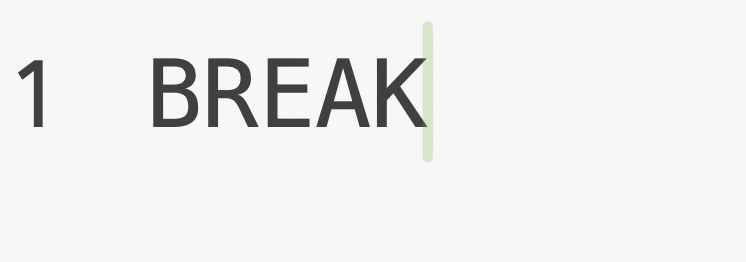



## Regression with predictors
In the next section, we will perform a linear regression on features extracted from timeline dataframe.
We will encode features such as the day of the week & if the day is a holiday as predictors for the amount of players in a given moment

We will use one-hot encoding to encode the categorical data into a regression-friendly form

In [75]:
from datetime import datetime
import datetime

In [76]:
timeline.loc[1, "timestamp"] #pulling timestamp frmo a thing

Timestamp('2024-04-06 10:27:00')

In [77]:
timeline.loc[1, "timestamp"].weekday()
#monday is 0, sunday is 6.
#1 is tues
#2 is wed
#3 is thurs
#4 is fri
#5 is sat

5

In [78]:
day_of_week_int = []

for snapshot in timeline.index:
    day_of_week_int.append(
        timeline["timestamp"][snapshot].weekday()
    )

#timeline_features = timeline.assign(day_of_week_int=day_of_week_int)
#timeline_features["day_of_week_int"].value_counts()
day_of_week_one_hot = pd.get_dummies(day_of_week_int, dtype=int)

In [79]:
day_of_week_one_hot

,0,1,2,3,4,5,6
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
4146,0,0,0,1,0,0,0
4147,0,0,0,1,0,0,0
4148,0,0,0,1,0,0,0
4149,0,0,0,1,0,0,0


In [80]:
day_of_week_one_hot.columns = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

In [81]:
timeline_features = pd.concat([timeline, day_of_week_one_hot], axis=1)

In [82]:
timeline_features

,timestamp,concurrent,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2024-04-06 09:27:00,1,0,0,0,0,0,1,0
1,2024-04-06 10:27:00,0,0,0,0,0,0,1,0
2,2024-04-06 11:27:00,0,0,0,0,0,0,1,0
3,2024-04-06 12:27:00,0,0,0,0,0,0,1,0
4,2024-04-06 13:27:00,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4146,2024-09-26 03:27:00,0,0,0,0,1,0,0,0
4147,2024-09-26 04:27:00,0,0,0,0,1,0,0,0
4148,2024-09-26 05:27:00,0,0,0,0,1,0,0,0
4149,2024-09-26 06:27:00,1,0,0,0,1,0,0,0


In [83]:
bc_holidays_2024 = [
    datetime.date(2024, 1, 1),   # New Year’s Day
    datetime.date(2024, 2, 19),  # Family Day
    datetime.date(2024, 3, 29),  # Good Friday
    datetime.date(2024, 5, 20),  # Victoria Day
    datetime.date(2024, 7, 1),   # Canada Day
    datetime.date(2024, 8, 5),   # B.C. Day
    datetime.date(2024, 9, 2),   # Labour Day
    datetime.date(2024, 9, 30),  # National Day for Truth and Reconciliation
    datetime.date(2024, 10, 14), # Thanksgiving Day
    datetime.date(2024, 11, 11), # Remembrance Day
    datetime.date(2024, 12, 25), # Christmas Day
]
#these are a list of the 11 statutory holidays in BC

In [84]:
bc_holidays_2024[4]

datetime.date(2024, 7, 1)

In [85]:
timeline.loc[2064, "timestamp"].to_pydatetime().date() #looking in timeline.csv found this

datetime.date(2024, 7, 1)

In [86]:
bc_holidays_2024[4] == timeline.loc[2064, "timestamp"].to_pydatetime().date()

True

In [87]:
# is_holiday = []

# for snapshot in timeline.index:

#     holiday_series = (
#         timeline.loc[snapshot, "timestamp"].to_pydatetime().date() in bc_holidays_2024
#     ) #series of true and false

    
is_holiday = []

for snapshot in timeline.index:
    date = timeline.loc[snapshot, "timestamp"].to_pydatetime().date()
    is_holiday.append(date in bc_holidays_2024) #membership test, T/F


In [88]:
#is_holiday[2064:2068] #this is canada day

In [89]:
#is_holiday[0:3]

In [90]:
timeline_features = timeline_features.assign(holiday=is_holiday)

In [91]:
timeline_features.replace({False: 0, True: 1}, inplace=True)

/tmp/ipykernel_10052/2422512024.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  timeline_features.replace({False: 0, True: 1}, inplace=True)


In [92]:
timeline_features

,timestamp,concurrent,monday,tuesday,wednesday,thursday,friday,saturday,sunday,holiday
0,2024-04-06 09:27:00,1,0,0,0,0,0,1,0,0
1,2024-04-06 10:27:00,0,0,0,0,0,0,1,0,0
2,2024-04-06 11:27:00,0,0,0,0,0,0,1,0,0
3,2024-04-06 12:27:00,0,0,0,0,0,0,1,0,0
4,2024-04-06 13:27:00,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
4146,2024-09-26 03:27:00,0,0,0,0,1,0,0,0,0
4147,2024-09-26 04:27:00,0,0,0,0,1,0,0,0,0
4148,2024-09-26 05:27:00,0,0,0,0,1,0,0,0,0
4149,2024-09-26 06:27:00,1,0,0,0,1,0,0,0,0


In [93]:
tf = timeline_features

## Now for the regression

In [94]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Output dataframes instead of arrays
# set_config(transform_output="pandas") --> this breaks it? because it one of these only supports sparse data? but that makes coefs to 10^12? this may be a sign of a larger issue.


In [95]:
pred_tf = tf.drop(["timestamp", "concurrent"], axis=1)

In [96]:
resp_tf = tf["concurrent"]

In [97]:
pred_tf_train, pred_tf_test, resp_tf_train, resp_tf_test = train_test_split(pred_tf, resp_tf, train_size=0.75)

In [98]:
print(pred_tf_train.shape, pred_tf_test.shape, resp_tf_train.shape, resp_tf_test.shape)

(3113, 8) (1038, 8) (3113,) (1038,)


In [99]:
enc = OneHotEncoder(drop="first")


In [100]:
pred_tf_train_transform = enc.fit_transform(pred_tf_train)

In [101]:
pred_tf_train_transform

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3185 stored elements and shape (3113, 8)>

In [102]:
model = LinearRegression()

In [103]:
model

LinearRegression()

In [104]:
model.fit(pred_tf_train_transform, resp_tf_train)

LinearRegression()

In [105]:
model.coef_

array([-0.07972497, -0.01931255, -0.04526866, -0.06707464, -0.00908096,
        0.08929728,  0.13116449,  0.16997355])

In [106]:
#monday through sunday, then holiday factor

In [107]:
RMSPE = mean_squared_error(
    y_true=resp_tf_test,
    y_pred=model.predict(pred_tf_test)
)**(1/2)

RMSPE

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


np.float64(0.6470822566205798)

In [ ]:
alt.Chart(timeline_features).mark_bar().encode(
    x="timestamp",
    y="concurrent"
)
##wait i want to do month but the data is untidy. i should do it above, in a seperate df. for later i guess